In [121]:
import pandas as pd
import matplotlib.pyplot as plt

In [122]:
url='https://raw.githubusercontent.com/WaTheDarknest/CSI/main/Dataset/Dataset/%E0%B8%8A%E0%B8%B1%E0%B9%89%E0%B8%994/TX1(%E0%B8%8A%E0%B8%B1%E0%B9%89%E0%B8%994)(%E0%B8%AB%E0%B9%89%E0%B8%AD%E0%B8%87%E0%B8%9B%E0%B8%81%E0%B8%95%E0%B8%B4)(40Sec).csv'
dataset=pd.read_csv(url)
dataset

<ipython-input-122-336ad4d14a71>:2: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  dataset=pd.read_csv(url)


,real_timestamp,Delta t,Zone,R1,I1,Mag1,R2,I2,Mag2,R3,...,Mag61,R62,I62,Mag62,R63,I63,Mag63,R64,I64,Mag64
0,0.595506,-,1,28,-64,69.856997,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,0.601973,0.006467,1,-99,-48,110.022725,9,0,9,0,...,0,0,0,0,0,0,0,0,0,0
2,0.626595,0.024622,1,-121,112,164.878743,8,0,8,0,...,0,0,0,0,0,0,0,0,0,0
3,0.636548,0.009953,1,-122,-31,125.876924,23,0,23,0,...,0,0,0,0,0,0,0,0,0,0
4,0.660641,0.024093,1,-122,-31,125.876924,23,0,23,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12871,39.912000,0.0494,4,84,-64,105.603030,4,0,4,0,...,0,0,0,0,0,0,0,0,0,0
12872,39.918000,0.006,4,84,-64,105.603030,4,0,4,0,...,0,0,0,0,0,0,0,0,0,0
12873,39.924600,0.0066,4,84,-64,105.603030,4,0,4,0,...,0,0,0,0,0,0,0,0,0,0
12874,39.931900,0.0073,4,84,-64,105.603030,4,0,4,0,...,0,0,0,0,0,0,0,0,0,0


In [123]:
from sklearn.model_selection import train_test_split
from sklearn import tree

feature_cols=[ 'Mag7', 'Mag8', 'Mag9', 'Mag10', 'Mag11', 'Mag12', 'Mag13', 'Mag14'
                    , 'Mag15', 'Mag16', 'Mag17', 'Mag18', 'Mag19', 'Mag20'
                    , 'Mag21', 'Mag22', 'Mag23', 'Mag24', 'Mag25', 'Mag26'
                    , 'Mag27', 'Mag28', 'Mag29', 'Mag30', 'Mag31', 'Mag32'
                    , 'Mag34', 'Mag35', 'Mag36', 'Mag37', 'Mag38', 'Mag39'
                    , 'Mag40', 'Mag41', 'Mag42', 'Mag43', 'Mag44', 'Mag45'
                    , 'Mag46', 'Mag47' ,'Mag48', 'Mag49', 'Mag50', 'Mag51'
                    , 'Mag52', 'Mag53', 'Mag54', 'Mag55', 'Mag56', 'Mag57', 'Mag58', 'Mag59'] #52

# 'Mag1', 'Mag2'        ไม่นำมาพิจารณาเพราะว่าตัวแปรดังกล่าวค่าส่วนใหญ่มีค่าที่ซ้ำกัน
# 'Mag3', 'Mag4', 'Mag5', 'Mag6', 'Mag33', 'Mag60', 'Mag61', 'Mag62', 'Mag63', 'Mag64'   ไม่นำมาพิจารณาเพราะว่าตัวแปรดังกล่าวมีค่าเป็น 0
target_col='Zone'
X=dataset[feature_cols]
y=dataset[target_col]

test_size=0.5
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=test_size, random_state=5)

In [124]:
model = tree.DecisionTreeClassifier()
model.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [125]:
params={'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
#  'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}
model=tree.DecisionTreeClassifier(**params)

In [126]:
model = model.fit(X_train, y_train)
model

DecisionTreeClassifier(max_depth=3)

In [127]:
# แสดงค่าความสำคัญของเเต่ละ feature
fs = pd.Series(model.feature_importances_, index=X_train.columns.sort_values(ascending=True))
fs

Mag10    0.069109
Mag11    0.000000
Mag12    0.022963
Mag13    0.000000
Mag14    0.000000
Mag15    0.000000
Mag16    0.000000
Mag17    0.000000
Mag18    0.000000
Mag19    0.000000
Mag20    0.000000
Mag21    0.000000
Mag22    0.000000
Mag23    0.000000
Mag24    0.000000
Mag25    0.000000
Mag26    0.000000
Mag27    0.000000
Mag28    0.000000
Mag29    0.000000
Mag30    0.000000
Mag31    0.366913
Mag32    0.000000
Mag34    0.000000
Mag35    0.000000
Mag36    0.000000
Mag37    0.000000
Mag38    0.000000
Mag39    0.000000
Mag40    0.000000
Mag41    0.000000
Mag42    0.000000
Mag43    0.000000
Mag44    0.000000
Mag45    0.000000
Mag46    0.000000
Mag47    0.000000
Mag48    0.000000
Mag49    0.413757
Mag50    0.125145
Mag51    0.000000
Mag52    0.000000
Mag53    0.000000
Mag54    0.000000
Mag55    0.000000
Mag56    0.000000
Mag57    0.000000
Mag58    0.000000
Mag59    0.000000
Mag7     0.002111
Mag8     0.000000
Mag9     0.000000
dtype: float64

In [128]:
model.score(X_train, y_train)

0.7808325566946257

In [129]:
model.score(X_test, y_test)

0.7791239515377446

In [130]:
model.__dict__

{'criterion': 'gini',
 'splitter': 'best',
 'max_depth': 3,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'min_weight_fraction_leaf': 0.0,
 'max_features': None,
 'max_leaf_nodes': None,
 'random_state': None,
 'min_impurity_decrease': 0.0,
 'class_weight': None,
 'ccp_alpha': 0.0,
 'feature_names_in_': array(['Mag7', 'Mag8', 'Mag9', 'Mag10', 'Mag11', 'Mag12', 'Mag13',
        'Mag14', 'Mag15', 'Mag16', 'Mag17', 'Mag18', 'Mag19', 'Mag20',
        'Mag21', 'Mag22', 'Mag23', 'Mag24', 'Mag25', 'Mag26', 'Mag27',
        'Mag28', 'Mag29', 'Mag30', 'Mag31', 'Mag32', 'Mag34', 'Mag35',
        'Mag36', 'Mag37', 'Mag38', 'Mag39', 'Mag40', 'Mag41', 'Mag42',
        'Mag43', 'Mag44', 'Mag45', 'Mag46', 'Mag47', 'Mag48', 'Mag49',
        'Mag50', 'Mag51', 'Mag52', 'Mag53', 'Mag54', 'Mag55', 'Mag56',
        'Mag57', 'Mag58', 'Mag59'], dtype=object),
 'n_features_in_': 52,
 'n_outputs_': 1,
 'classes_': array([1, 2, 3, 4]),
 'n_classes_': 4,
 'max_features_': 52,
 'tree_': <sklearn.tree._tree.Tr

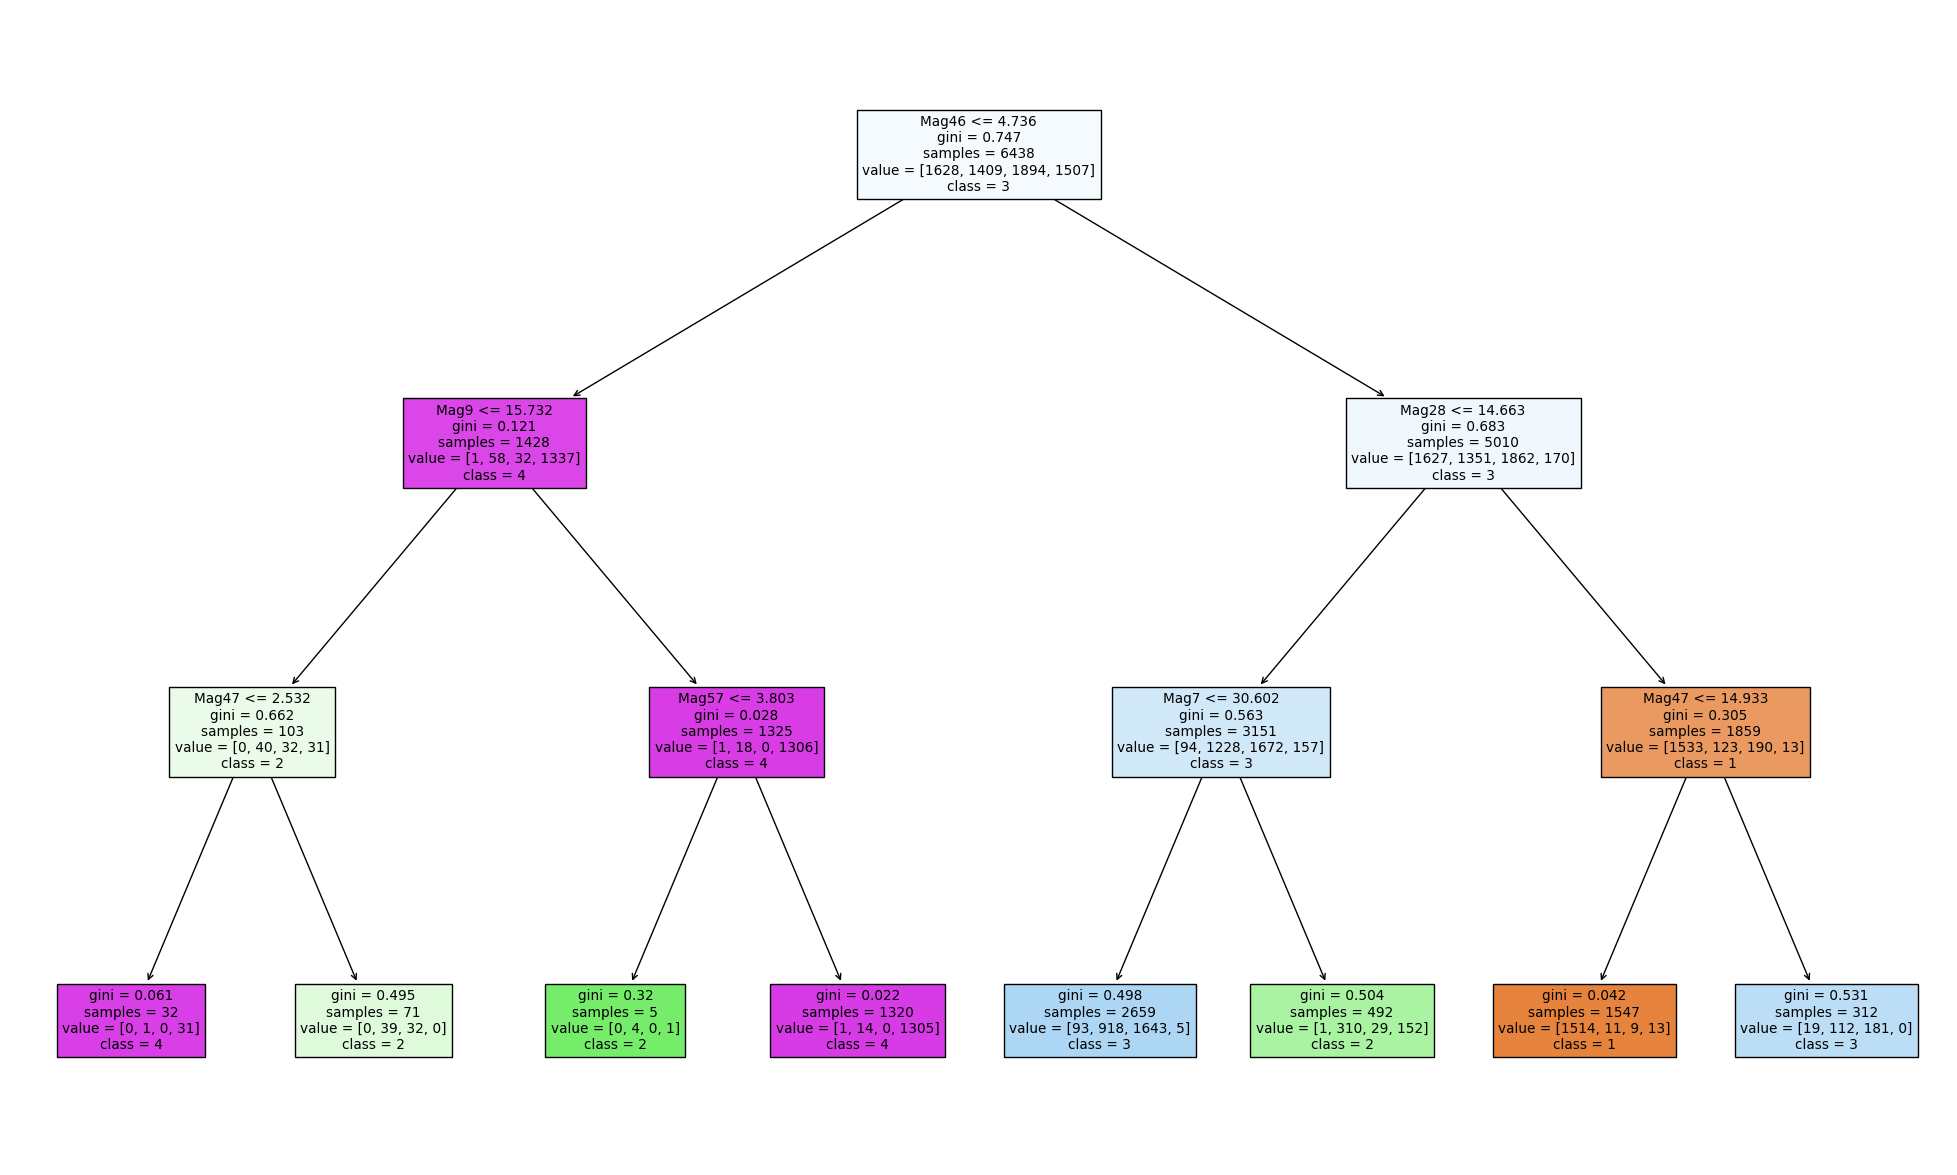

In [131]:
fig = plt.figure(figsize=(25,15))
_ = tree.plot_tree(model,feature_names= feature_cols,class_names=['1','2','3','4'],
                   filled=True)

In [132]:
from sklearn import metrics
predicted = model.predict(X_test)
print(f'accuracy = {metrics.accuracy_score(y_test, predicted)}')

accuracy = 0.7791239515377446
